
##real estate price predictor



In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("housingdata.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LTSTAT   506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [6]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

housing.describe()

In [7]:
%matplotlib inline

In [8]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LTSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

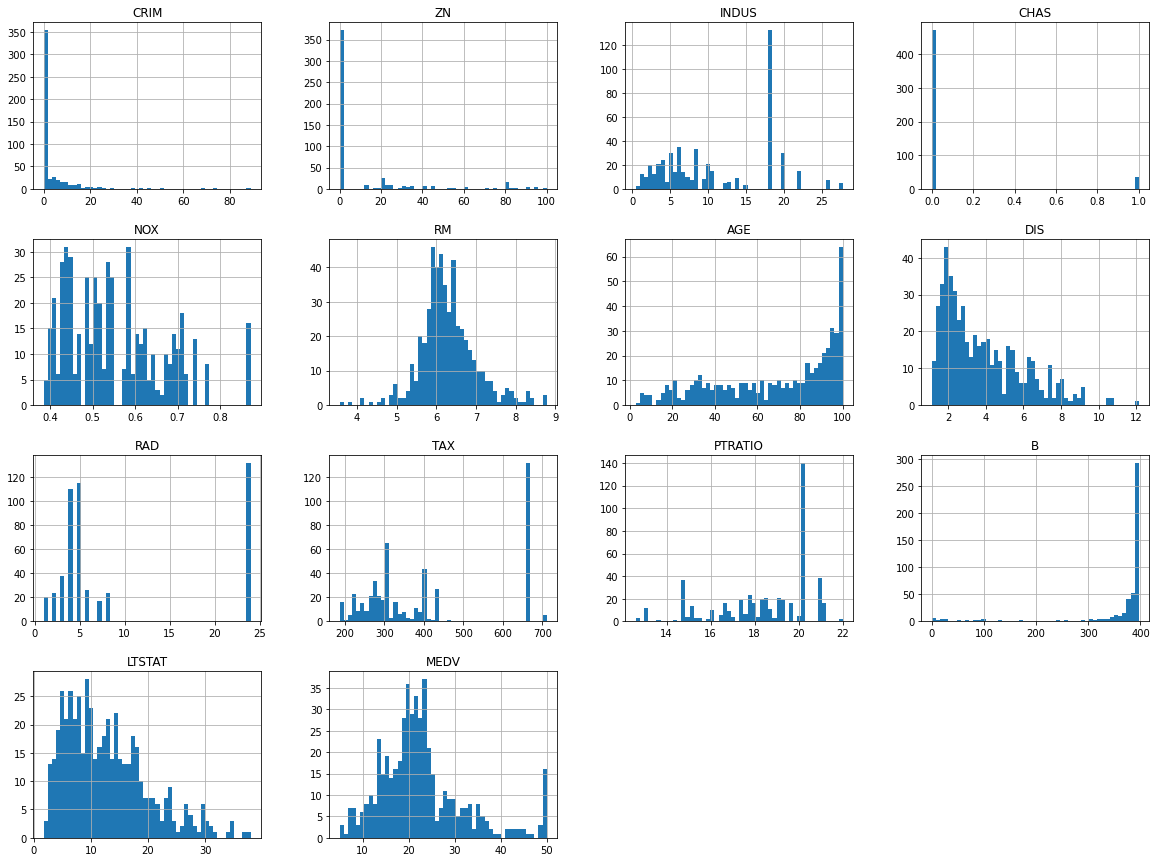

In [9]:
housing.hist(bins=50,figsize=(20,15))


##train test splliting


In [10]:
import numpy as np
# np.random.seed(42) _> fixesxthe xcurreny values of data
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices= shuffled[:test_set_size]
    train_indices= shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_set,test_set= split_train_test(housing,0.2)

In [12]:
print(f"Rows of trainset:{len(train_set)} \nRows of test set: {len(test_set)} \n")

Rows of trainset:405 
Rows of test set: 101 



In [13]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows of trainset:{len(train_set)} \nRows of test set: {len(test_set)} \n")

Rows of trainset:404 
Rows of test set: 102 



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split =StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]
    


In [15]:
# corr_matrix  = housing.corr()

In [16]:
# corr_matrix['MEDV'].sort_values(ascending= False)

In [17]:
#pearson co_relation co-factor= if weincrease 1 factor whether other will increase or decrease
#1==> strong +ve coeff (increase) , -ve==>(decrease)
# eg as age increases price of house decreases so value is -ve
# comparig coeff of label with features

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LTSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LTSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='LTSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LTSTAT'>,
        <AxesSubplot:xlabel='LTSTAT', ylabel='LTSTAT'>]], dtype=object)

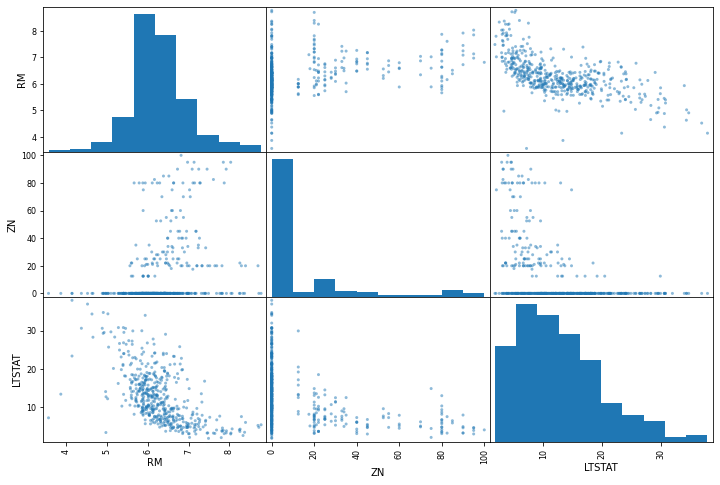

In [18]:
from pandas.plotting import scatter_matrix
attributes=["RM","ZN","LTSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

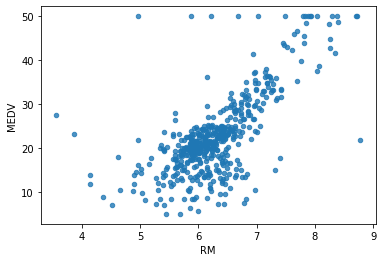

In [19]:
housing.plot( kind="scatter",x="RM",y="MEDV",alpha=0.8)

##Trying out attribute combinatiom

In [20]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [22]:
corr_matrix  = housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)


MEDV       1.000000
RM         0.694605
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.538415
LTSTAT    -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

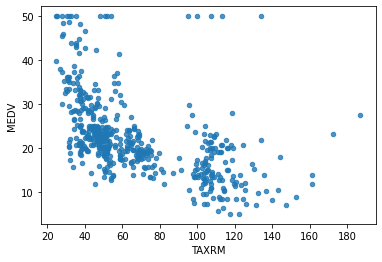

In [23]:
 housing.plot( kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [24]:
     housing = strat_train_set.drop("MEDV", axis=1)
     housing_labels =strat_train_set["MEDV"].copy()


In [25]:
# in case of datapoints misisng we have three options
# remove the data points
# remove the attribute
# replace with 0 ,mean or modian

In [26]:
a=housing.dropna(subset=["RM"])#creates acopy in which data points are dropped ...no affect on original datapoints
a.shape


(400, 13)

In [27]:
housing.drop("RM",axis=1).shape#no rm coloumn visible/origial dataframe is unchanged

(404, 12)

In [28]:
median=housing["RM"].median()

In [29]:
median

6.21

In [30]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [31]:
from sklearn.impute import SimpleImputer


In [32]:
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
 imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [34]:
X = imputer.transform(housing)

In [35]:
housing_tr = pd.DataFrame(X, columns= housing.columns)

In [36]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LTSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281688,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709490,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


##scikitlearn design
primarily has 3 kinds of objects
1.estimtors-it estimates parameter based on dataset eg imputer
methods:fit--> sees the dataset and fits accordingly
        transform--> may or maynot tramsform the dataset
        
2.transformers-->takes input and based on learning from fit returns output to and transform the data frame
it has a convinence function called fit transform which fits then transform  fit_transform()
3.predictors-->linear regression-> predicts an outcome
methods -> fit and predict
score function..evaluates the predictios

##creating pipeline


##creating a pipelies means that creating a code such that we can re edit it and reuse it..changinhg models stratergies etc

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
    
])


In [38]:
#most machine leearning models work well when features(numerical attributes) are scaled..that is they lie within a particular range
#hence we will use feature scaling in our model
# basically series of steps to automate our programme

##feature scaling

#primaryly two types of feature scaling methods
1.min-max scaling(normalization)


2.standardization

1.min-max scaling(normalization)=(val-min)/max-min==> all values co  mes in same scale(values lie between 0 and 1)
sklearn provides MinMaxScaler

2.standardization=(val - mean)/std deviation..we can do standard scaler
we can use sl;earn class Standard Scaler for this

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [40]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

housing_num_tr is a num py array
as we are going to usepredictor models we use numpy  array as input hence we are not going to converrt it into pandas data frame


in actual models we will do preprocesing inside  pipeline

##pipeline wil fit the data inside imputer and then finally inside da standaedise function

##seclecting a desired model 

In [41]:
housing_num_tr.shape

(404, 13)

In [42]:
housing_labels.shape

(404,)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = DecisionTreeRegressor()
# model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)


RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]

In [45]:
some_labels = housing_labels[:5]

In [46]:
prepared_data = my_pipeline.transform(some_data)

In [47]:
# now we had selected some data and passed it through pipeline so taht it is prepared

In [48]:
model.predict(prepared_data)

array([22.477, 25.52 , 16.474, 23.351, 23.459])

In [49]:
# givea amd array of predicted data

In [50]:
list(some_labels)#checking our prediction

[21.9, 24.5, 16.7, 23.1, 23.0]

In [51]:
#evaluating the model by finding root mean square error

In [52]:
from sklearn.metrics import mean_squared_error
housing_predictions= model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [53]:
lin_rmse

1.1693503961644256

In [54]:
 #the above is a case of overfitting 
#     this is not an ideal model as it seems to

##using better evaluation techinque for cross validation

In [55]:
#deviding our data into groups
# 1 2 3 4 5 6 7 8 9 10
# now fist we will use group 1 data as test and rest to train
# similarly use grp 2 data to test and remining to train
# and often permute and combine to check for overfitting

In [56]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr,housing_labels,scoring= "neg_mean_squared_error",cv=10)
rmse_score=np.sqrt(-scores)

In [57]:
# when we find cost lower value for error is better but as cross validation checks the correction of model greater value of error is better

In [58]:
rmse_score

array([2.76774292, 2.73043432, 4.33408703, 2.61587323, 3.2659382 ,
       2.57102306, 4.79551676, 3.24523108, 3.30462776, 3.18223506])

In [59]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("standarddeviation:",scores.std())
    
    

##saving the model


In [60]:
print_scores(rmse_score)

Scores: [2.76774292 2.73043432 4.33408703 2.61587323 3.2659382  2.57102306
 4.79551676 3.24523108 3.30462776 3.18223506]
Mean: 3.281270941409396
standarddeviation: 0.7019677985640261


In [61]:
from joblib import dump,load
dump(model,'RealEstate.joblib')

['RealEstate.joblib']

##Testing the model

In [62]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)


In [63]:
final_rmse

2.9291724923937252

In [64]:
print(final_predictions,list(Y_test))

[24.484 11.473 25.072 21.446 18.285 15.144 19.958 14.585 31.44  40.283
 19.88  11.504 24.18  28.799 19.419 10.532 31.862 14.483 23.653 19.014
 19.708 17.94  17.616 22.101 18.29  30.446 16.312 32.67   9.177 33.65
 23.239 21.372 22.93  10.919 20.914 11.335 42.577 24.52  23.184 41.649
 23.878 29.486 20.295 20.891 19.501 33.657 44.369 19.955 20.259 21.35
 21.671 14.555 21.152 14.993 24.654 32.664 42.312 28.318 19.363 20.93
 47.461 10.016 18.701 24.818 15.076 32.785 19.489 17.838 18.89  33.949
 27.001 22.885 21.585 22.523 34.903 12.814 15.987 19.923 20.788 21.393
 22.405 21.608 14.191 22.75  20.642 21.204 13.921 21.339 22.016 23.131
 18.862 27.546  7.442 26.257 18.645 29.85  19.735 31.283 14.624 26.448
 21.002 20.108] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4